In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
%matplotlib inline

## Load the data

In [2]:
%%time
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Wall time: 2.25 s


In [3]:
# 50,000 images
# 32 * 32, 3 as color(red, blue, green)

X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train[0].shape

(32, 32, 3)

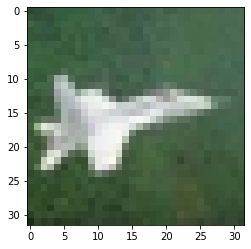

In [6]:
plt.imshow(X_train[77]);

In [7]:
y_train[77]

array([0], dtype=uint8)

C:\Users\Perry\anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Wall time: 3.28 s


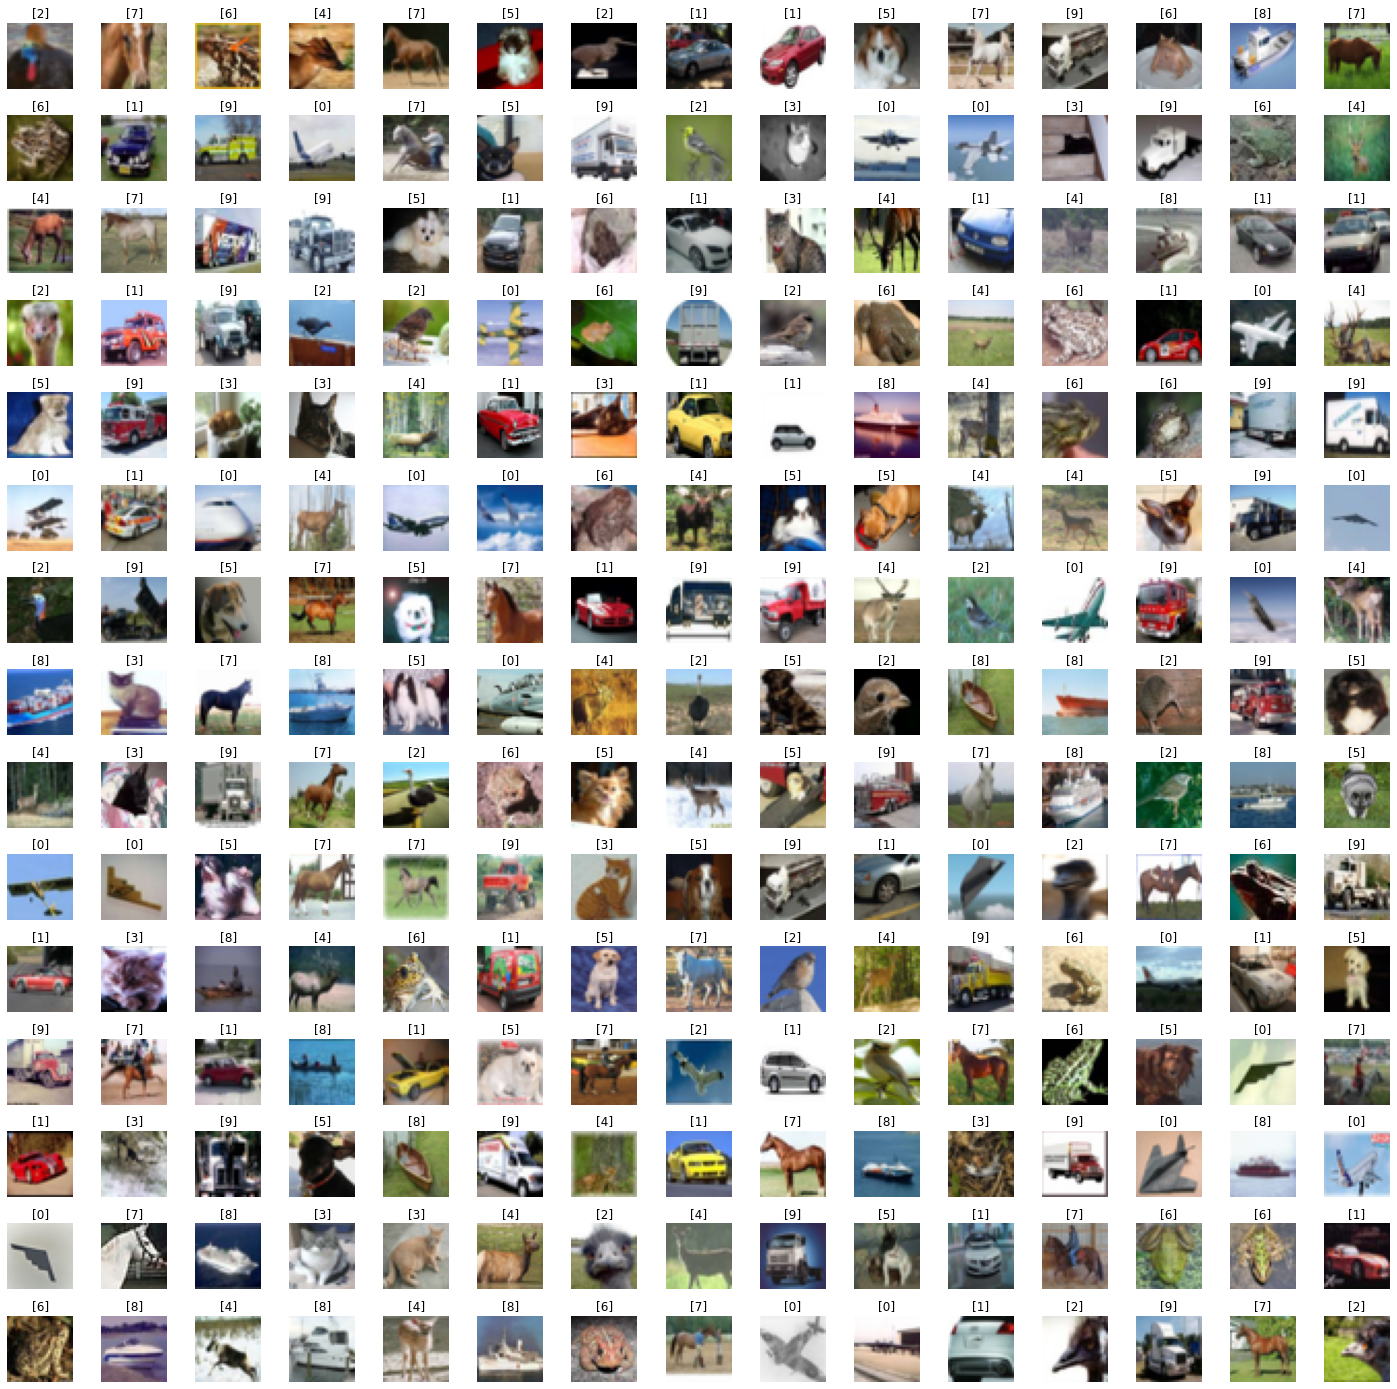

In [8]:
%%time
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
y_train.shape

(50000, 1)

### Categorize the label, y, since y is multi-class labels.

In [11]:
from tensorflow.keras.utils import to_categorical

y_cat_train = to_categorical(y=y_train, num_classes=10)
y_cat_test = to_categorical(y=y_test, num_classes=10)

In [12]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
y_cat_train.shape

(50000, 10)

In [14]:
y_cat_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [15]:
y_cat_test.shape

(10000, 10)

In [16]:
# only for binary y
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit_transform(y_train)

C:\Users\Perry\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([6, 9, 9, ..., 9, 1, 1], dtype=int64)

In [17]:
le.transform(y_test)

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

### Feature scaling for X

In [18]:
X_train = X_train / 255
X_test = X_test / 255

In [19]:
input_shape = X_train.shape[1:]
input_shape

(32, 32, 3)

## Model Training (CNN)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout

model = Sequential()

# CONVOLUTIONAL LAYER
model.add(layer=Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))

# POOLING LAYER
model.add(layer=MaxPooling2D(pool_size=(2, 2)))

# DORP OUT
model.add(layer=Dropout(0.3))

# FLATTEN IMAGES FROM 32 by 32 by 3 to 3072 BEFORE FINAL LAYER
model.add(layer=Flatten())

model.add(layer=Dense(units=512, activation="relu"))
model.add(layer=Dense(units=512, activation="relu"))
model.add(layer=Dense(units=512, activation="relu"))

# output layer Softmax -> Multi Class
# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(layer=Dense(units=10, activation="softmax"))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3686912   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               2

In [22]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics="accuracy")

In [23]:
%%time
history = model.fit(X_train, y_cat_train, batch_size=32, epochs=10, verbose=1, validation_split=0.2,
                    shuffle=True,
                    validation_data=(X_test, y_cat_test));

Epoch 1/10
1250/1250 [==============================] - 36s 28ms/step - loss: 1.4867 - accuracy: 0.4576 - val_loss: 1.2381 - val_accuracy: 0.5650
Epoch 2/10
1250/1250 [==============================] - 37s 29ms/step - loss: 1.1516 - accuracy: 0.5897 - val_loss: 1.1838 - val_accuracy: 0.5927
Epoch 3/10
1250/1250 [==============================] - 37s 29ms/step - loss: 0.9694 - accuracy: 0.6597 - val_loss: 1.0724 - val_accuracy: 0.6284
Epoch 4/10
1250/1250 [==============================] - 37s 29ms/step - loss: 0.8197 - accuracy: 0.7124 - val_loss: 1.0641 - val_accuracy: 0.6402
Epoch 5/10
1250/1250 [==============================] - 38s 30ms/step - loss: 0.6894 - accuracy: 0.7548 - val_loss: 1.1210 - val_accuracy: 0.6388
Epoch 6/10
1250/1250 [==============================] - 39s 31ms/step - loss: 0.5810 - accuracy: 0.7937 - val_loss: 1.1112 - val_accuracy: 0.6552
Epoch 7/10
1250/1250 [==============================] - 40s 32ms/step - loss: 0.4806 - accuracy: 0.8285 - val_loss: 1.2222 -

## Evaluate the Model 

In [24]:
model.evaluate(X_test, y_cat_test)

313/313 [==============================] - 2s 8ms/step - loss: 1.4199 - accuracy: 0.6319


[1.41985023021698, 0.6319000124931335]

In [25]:
pd.DataFrame(data=history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.486662,0.457600,1.238051,0.5650
1,1.151586,0.589725,1.183791,0.5927
2,0.969353,0.659700,1.072445,0.6284
3,0.819692,0.712425,1.064071,0.6402
4,0.689448,0.754750,1.120977,0.6388
5,0.581012,0.793675,1.111177,0.6552
6,0.480585,0.828550,1.222176,0.6421
7,0.401543,0.859125,1.325773,0.6305
8,0.344982,0.880625,1.422003,0.6448
9,0.303562,0.893675,1.424516,0.6414


In [26]:
predictions = model.predict_classes(X_test)
predictions

C:\Users\Perry\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3, 1, 8, ..., 5, 1, 7], dtype=int64)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.63      0.76      0.69      1000
           1       0.75      0.79      0.77      1000
           2       0.58      0.45      0.51      1000
           3       0.43      0.41      0.42      1000
           4       0.63      0.49      0.55      1000
           5       0.44      0.57      0.50      1000
           6       0.73      0.69      0.71      1000
           7       0.69      0.70      0.69      1000
           8       0.80      0.75      0.77      1000
           9       0.71      0.72      0.72      1000

    accuracy                           0.63     10000
   macro avg       0.64      0.63      0.63     10000
weighted avg       0.64      0.63      0.63     10000

[[760  24  34  24  16   7  11  20  49  55]
 [ 32 787  10  12   2  13  11   6  23 104]
 [110   9 453  73  81 126  61  51  21  15]
 [ 36  19  62 410  46 274  56  45  21  31]
 [ 50   7  91  93 487 114  62  75  12   9]
 [ 29   4  49 175  37 573 

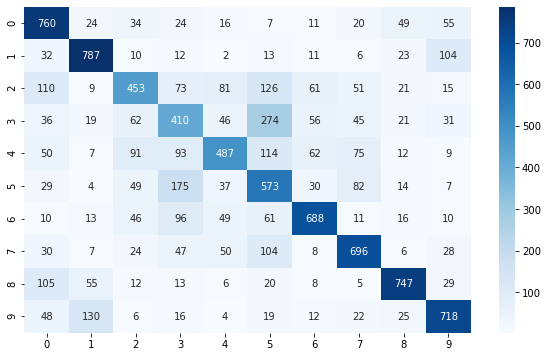

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=confusion_matrix(y_true=y_test, y_pred=predictions), cmap="Blues", annot=True, fmt='.3g');

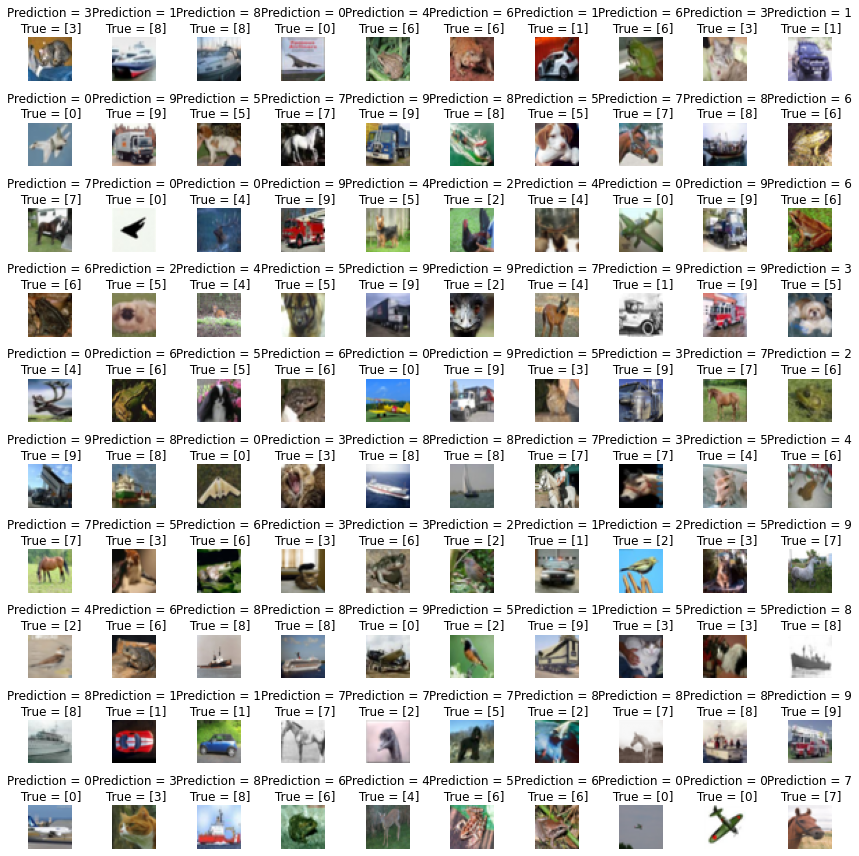

In [29]:
L = 10
W = 10
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predictions[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)
plt.tight_layout();

## Model Save

In [30]:
model.save(filepath="cnn_cifar10.h5")

In [32]:
from tensorflow.keras.models import load_model

later_model = load_model(filepath="cnn_cifar10.h5")

In [33]:
later_model

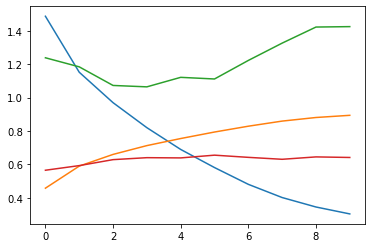

In [41]:
plt.plot(pd.DataFrame(data=history.history));